In [3]:
from likelihood_cooling import *
from detection import *
import matplotlib.pyplot as plt
import numpy as np
import time
from iminuit import Minuit
from scipy.stats import chi2   
import os.path
import pandas as pd 

# plt.style.use('style.mplstyle')

In [4]:
#Parameters initial allowed space
#Cooling
Tci, Tcf = 1, 10
tau_ci, tau_cf = 1, 15
Rci, Rcf = 1, 100
tau_i, tau_f = 1, 1.4
#Off-set times
toff_K_i,toff_K_f =0,6
toff_I_i,toff_I_f =0,6
toff_B_i,toff_B_f =0,6
#nubar_e survival probability 
Pee_i,Pee_f=0,1


In [5]:
params=["Tc","tau_c","Rc","tau","toff_K","toff_I","toff_B"]

#NH
Likelihood_c_NH.errordef = Minuit.LEAST_SQUARES
x0_c_NH=[3.27,5.1,62,1.2,0,0,0]
m_c_NH = Minuit(Likelihood_c_NH, x0_c_NH)
m_c_NH.limits = [(Tci, Tcf), (tau_ci, tau_cf), (Rci, Rcf),(tau_i, tau_f),(toff_K_i,toff_K_f),(toff_I_i,toff_I_f),(toff_B_i,toff_B_f)]
m_c_NH.fixed["x3"] = True

#IH
Likelihood_c_IH.errordef = Minuit.LEAST_SQUARES
x0_c_IH=[3.27,5.1,62,1.2,0,0,0]
m_c_IH = Minuit(Likelihood_c_IH, x0_c_IH)
m_c_IH.limits = [(Tci, Tcf), (tau_ci, tau_cf), (Rci, Rcf),(tau_i, tau_f),(toff_K_i,toff_K_f),(toff_I_i,toff_I_f),(toff_B_i,toff_B_f)]
m_c_IH.fixed["x3"] = True

#Pee
Likelihood_c_Pee.errordef = Minuit.LEAST_SQUARES
x0_c_Pee=[3.65,40,31,1.2,0.5,0,0,0]
m_c_Pee = Minuit(Likelihood_c_Pee, x0_c_Pee)
m_c_Pee.limits = [(Tci, Tcf), (tau_ci, tau_cf), (Rci, Rcf),(tau_i, tau_f), (Pee_i, Pee_f),(toff_K_i,toff_K_f),(toff_I_i,toff_I_f),(toff_B_i,toff_B_f)]
m_c_Pee.fixed["x3"] = True

In [6]:
#NH
start_time = time.time()
m_c_NH.migrad()
print("Minuit NH= %s minutes" % ((time.time() - start_time)/60)) 
m_c_NH_BF=np.array(m_c_NH.values)

start_time = time.time()
m_c_NH.minos(cl=5)
print("Minos NH= %s minutes" % ((time.time() - start_time)/60))
print(m_c_NH.params)

#IH 
start_time = time.time()
m_c_IH.migrad()
print("Minuit IH= %s minutes" % ((time.time() - start_time)/60)) 
m_c_IH_BF=np.array(m_c_IH.values)

start_time = time.time()
m_c_IH.minos(cl=5)
print("Minos IH= %s minutes" % ((time.time() - start_time)/60))
print(m_c_IH.params)

#Pee
start_time = time.time()
m_c_Pee.migrad()
print("Minuit Pee= %s minutes" % ((time.time() - start_time)/60))
m_c_Pee_BF=np.array(m_c_Pee.values)
start_time = time.time()
m_c_Pee.minos()
print("Minos Pee= %s minutes" % ((time.time() - start_time)/60))
print(m_c_Pee.params)

/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis/cooling/detection.py:47: RuntimeWarning: invalid value encountered in sqrt
  p_pos = np.where(E_pos <= m_pos, 0., np.sqrt((E_pos**2)-(m_pos**2))) #positron momentum [MeV]


Minuit NH= 0.07777390480041504 minutes
Minos NH= 1.0895588954289754 minutes
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   3.66    │   0.17    │   -1.39    │    0.17    │    1    │   10    │       │
│ 1 │ x1   │    4.1    │    0.9    │    -2.9    │    10.9    │    1    │   15    │       │
│ 2 │ x2   │    36     │     7     │    -32     │     64     │    1    │   100   │       │
│ 3 │ x3   │   1.200   │   0.012   │            │            │    1    │   1.4   │  yes  │
│ 4 │ x4   │  0.07e-6  │181433.74e-6│  -0.07e-6  │181433.74e-6│    0    │    6    │       │
│ 5 │ x5   │ 0.013e-6  │118960.975e-6│ -0.013e-6  │118960.975e-6│    0    │    6    │       │
│ 6 │ x6   │  0.05e-6  │397665.84e-6│  -0.05e-6  │5999999.95e-6│    0    │    6    │       │
└───┴───

/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis/cooling/flavor_conversion.py:25: RuntimeWarning: divide by zero encountered in true_divide
  Pf=np.exp(U[0][2]**2*((20/E)**(2/3))/(-3.5*10**(-5)))


Minuit IH= 0.1136406421661377 minutes
Minos IH= 1.2745910962422689 minutes
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   3.52    │   0.04    │   -0.04    │    0.04    │    1    │   10    │       │
│ 1 │ x1   │    4.1    │    0.9    │    -2.8    │    10.9    │    1    │   15    │       │
│ 2 │ x2   │    30     │     5     │    -26     │     70     │    1    │   100   │       │
│ 3 │ x3   │   1.200   │   0.012   │            │            │    1    │   1.4   │  yes  │
│ 4 │ x4   │  0.07e-6  │188715.49e-6│  -0.07e-6  │188715.49e-6│    0    │    6    │       │
│ 5 │ x5   │  0.07e-6  │120783.91e-6│  -0.07e-6  │120783.91e-6│    0    │    6    │       │
│ 6 │ x6   │  0.07e-6  │407017.16e-6│  -0.07e-6  │5999999.93e-6│    0    │    6    │       │
└───┴──────

In [7]:
# for i in range(len(x0_c_NH)):  #not trusted i=0,4,5,6 - why?
#     if i != 3:
#         xtmp0 = m_c_NH0_BF.copy()
#         ltmp0=Likelihood_c_NH(xtmp0)
    
#         xtmp1=m_c_NH0_BF.copy()
#         xtmp1[i]= m_c_NH0_BF[i]+m_c_NH0.merrors["x"+str(i)].lower
#         ltmp1=Likelihood_c_NH(xtmp1)
    
#         xtmp2=m_c_NH0_BF.copy()
#         xtmp2[i]= m_c_NH0_BF[i]+m_c_NH0.merrors["x"+str(i)].upper
#         ltmp2=Likelihood_c_NH(xtmp2)
    
#         print(i,ltmp0,ltmp1,ltmp2)


In [8]:
######################################################################################
params_lim_NH=[(Tci, Tcf), (tau_ci, tau_cf), (Rci, Rcf),(tau_i, tau_f), 
            (toff_K_i,toff_K_f),(toff_I_i,toff_I_f),(toff_B_i,toff_B_f)]
params_lim_IH=[(Tci, Tcf), (tau_ci, tau_cf), (Rci, Rcf),(tau_i, tau_f), 
            (toff_K_i,toff_K_f),(toff_I_i,toff_I_f),(toff_B_i,toff_B_f)]
params_lim_Pee=[(Tci, Tcf), (tau_ci, tau_cf), (Rci, Rcf),(tau_i, tau_f),(0,1),
            (toff_K_i,toff_K_f),(toff_I_i,toff_I_f),(toff_B_i,toff_B_f)]


for i in range(len(params)):
  if i!=3:
    print(i)

    x_NH, L_NH, BFPoints_NH = param_profile(m_c_NH,"x%d"%i,params_lim_NH[i][0],params_lim_NH[i][1],size=40)
    ztmp=[]
    for j in range(len(x_NH)):
      ztmp.append([x_NH[j],L_NH[j],BFPoints_NH[j][0],BFPoints_NH[j][1],BFPoints_NH[j][2],BFPoints_NH[j][3],BFPoints_NH[j][4],BFPoints_NH[j][5],BFPoints_NH[j][6]])
    file_name="NH_c"+str(i)+".npy"
    np.save(file_name, ztmp)

    x_IH, L_IH, BFPoints_IH = param_profile(m_c_IH,"x%d"%i,params_lim_IH[i][0],params_lim_IH[i][1],size=40)
    ztmp=[]
    for j in range(len(x_IH)):
      ztmp.append([x_IH[j],L_IH[j],BFPoints_IH[j][0],BFPoints_IH[j][1],BFPoints_IH[j][2],BFPoints_IH[j][3],BFPoints_IH[j][4],BFPoints_IH[j][5],BFPoints_IH[j][6]])
    file_name="IH_c"+str(i)+".npy"
    np.save(file_name, ztmp)

for i in range(len(params)+1):
  if i!=3:
    print(i)

    x_Pee, L_Pee, BFPoints_Pee = param_profile(m_c_Pee,"x%d"%i,params_lim_Pee[i][0],params_lim_Pee[i][1],size=40)
    ztmp=[]
    for j in range(len(x_Pee)):
      ztmp.append([x_Pee[j],L_Pee[j],BFPoints_Pee[j][0],BFPoints_Pee[j][1],BFPoints_Pee[j][2],BFPoints_Pee[j][3],BFPoints_Pee[j][4],BFPoints_Pee[j][5],BFPoints_Pee[j][6],BFPoints_Pee[j][7]])
    file_name="Pee_c"+str(i)+".npy"
    np.save(file_name, ztmp)

0
1
2
4
5
6
0
1
2
4
5
6
7


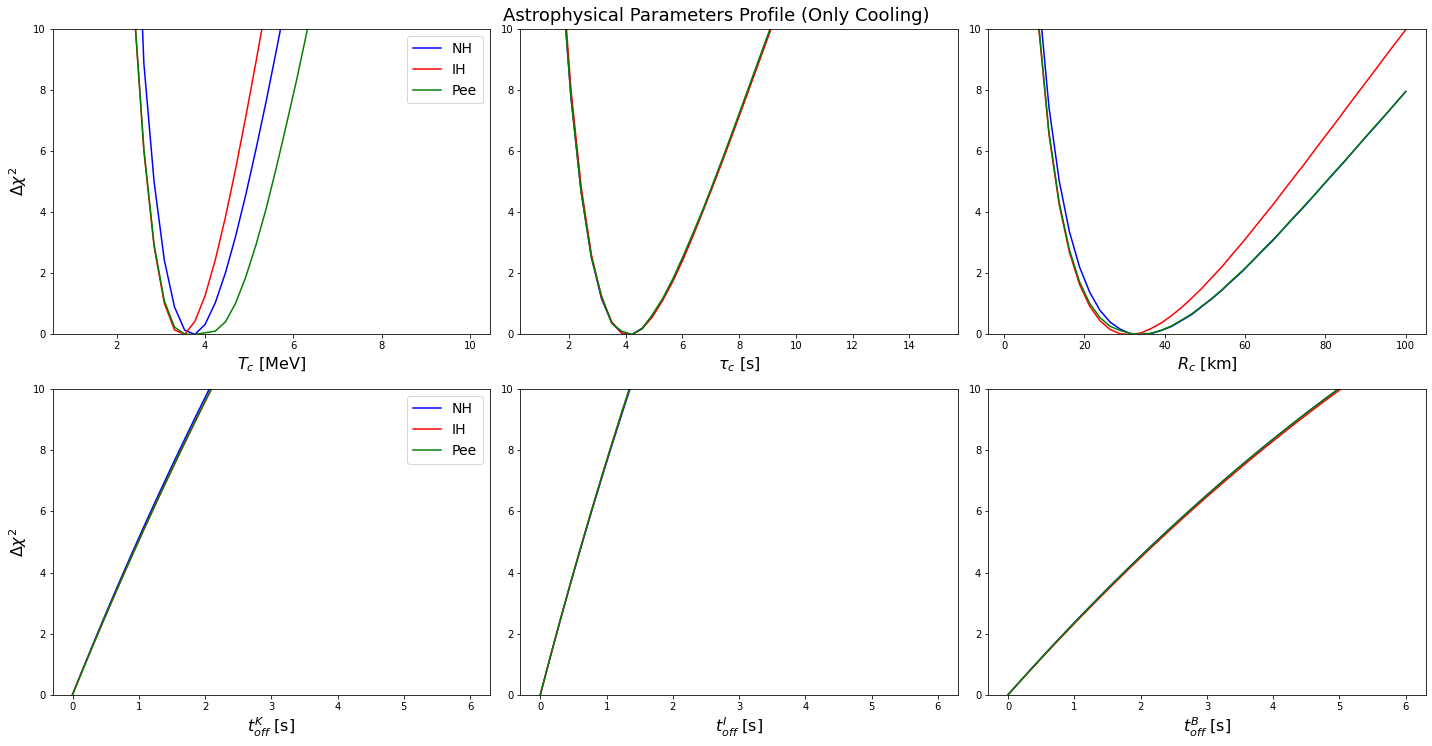

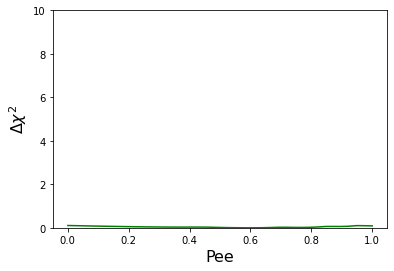

In [36]:
params_label=[r"$T_c$ [MeV]",r"$\tau_c$ [s]",r"$R_c$ [km]",
        r"$t_{off}^K$ [s]", r"$t_{off}^I$ [s]",r"$t_{off}^B$ [s]"]

x_c_a_NH_cont=[]
L_c_a_NH_cont=[]
x_c_a_IH_cont=[]
L_c_a_IH_cont=[]
x_c_a_Pee_cont=[]
L_c_a_Pee_cont=[]

for i in range(len(params_label)+1):
  if(i!=3):
    ztmp1=np.load("NH_c"+str(i)+".npy")
    ztmp2=np.load("IH_c"+str(i)+".npy")
    x_NHtmp=[]
    y_NHtmp=[]
    x_IHtmp=[]
    y_IHtmp=[]
    for ii in range(len(ztmp1)):
      x_NHtmp.append(ztmp1[ii][0])
      y_NHtmp.append(ztmp1[ii][1])
      x_IHtmp.append(ztmp2[ii][0])
      y_IHtmp.append(ztmp2[ii][1])
    x_c_a_NH_cont.append(x_NHtmp)
    L_c_a_NH_cont.append(y_NHtmp)
    x_c_a_IH_cont.append(x_IHtmp)
    L_c_a_IH_cont.append(y_IHtmp)
for i in range(len(params_label)+2):
  if(i!=3):
    ztmp3=np.load("Pee_c"+str(i)+".npy")
    x_Peetmp=[]
    y_Peetmp=[]
    for ii in range(len(ztmp3)):
      x_Peetmp.append(ztmp3[ii][0])
      y_Peetmp.append(ztmp3[ii][1])
    x_c_a_Pee_cont.append(x_Peetmp)
    L_c_a_Pee_cont.append(y_Peetmp)


plt.figure(figsize=(20,15))
ipp=[0,1,2,4,5,6,3]
for i in range(len(params_label)):

  plt.subplot(3,3,i+1)
  plt.plot(x_c_a_NH_cont[i],L_c_a_NH_cont[i],c='b', label='NH')
  plt.plot(x_c_a_IH_cont[i],L_c_a_IH_cont[i],c='r', label='IH')
  plt.plot(x_c_a_Pee_cont[ipp[i]],L_c_a_Pee_cont[ipp[i]],c='g', label='Pee')
#  plt.axvline(m_c_a_NH_cont_BF_aux[i],ls='--',c='b', label="NH - B.F.")
  plt.ylim(0,10)
  plt.xlabel(params_label[i],fontsize=16)
  if i%3==0:
      plt.ylabel(r'$\Delta\chi^2$',fontsize=16)
      plt.legend(fontsize=14)



plt.suptitle(r"Astrophysical Parameters Profile (Only Cooling)",fontsize=18)#+"\n"+
#             r"$T_c$=[%.1f-%.1f] MeV, $\tau_c$=[%.1f-%.1f] s, $R_c$=[%.1f-%.1f] km  "%(Tci,Tcf,tau_ci,tau_cf,Rci,Rcf),fontsize=18)
plt.tight_layout()
plt.show()

plt.plot(x_c_a_Pee_cont[3],L_c_a_Pee_cont[3],c='g', label='Pee')
plt.ylim(0,10)
plt.xlabel(r'Pee',fontsize=16)
plt.ylabel(r'$\Delta\chi^2$',fontsize=16)
plt.show()






In [42]:
nint=3
print(str(nint)+'-sigma intervals:')
print()

print('NH')
iind=[0,1,2,4,5,6]
for i in range(len(params_label)):
  x_c_3sig=[]
  for jj in range(len(x_c_a_NH_cont[i])):
    if L_c_a_NH_cont[i][jj] <= nint**2: 
      x_c_3sig.append(x_c_a_NH_cont[i][jj])
  print('x'+str(i)+':   ',min(x_c_3sig),max(x_c_3sig))
print()

print('IH')
iind=[0,1,2,4,5,6]
for i in range(len(params_label)):
  x_c_3sig=[]
  for jj in range(len(x_c_a_IH_cont[i])):
    if L_c_a_IH_cont[i][jj] <= nint**2: 
      x_c_3sig.append(x_c_a_IH_cont[i][jj])
  print('x'+str(i)+':   ',min(x_c_3sig),max(x_c_3sig))
print()


3-sigma intervals:

NH
x0:    2.6153846153846154 5.384615384615385
x1:    2.0769230769230766 8.538461538461538
x2:    11.153846153846153 100.0
x3:    0.0 1.6923076923076925
x4:    0.0 1.076923076923077
x5:    0.0 4.307692307692308

IH
x0:    2.6153846153846154 5.153846153846154
x1:    2.0769230769230766 8.538461538461538
x2:    11.153846153846153 92.38461538461539
x3:    0.0 1.8461538461538463
x4:    0.0 1.076923076923077
x5:    0.0 4.307692307692308

